#### Script that evalueates the synthetic profiles for the 4 types of profiles present

In [98]:
import pandas as pd
import numpy as np
import os
import glob
import random
from tqdm import tqdm_notebook as tqdm
import seaborn as sns
from fitter import Fitter, get_common_distributions, get_distributions
from sklearn.metrics import mean_squared_error
import pickle
import scipy.stats
from scipy.stats import *

from support import *
from features.feature_ts import genX
from experiment.algorithms.cluster_prep import *
from Gauss_fit_functions import extractFIT, extractToPs , gauss, straight_line
from synthetic_profiles_functions import *

In [3]:
X = genX([1994,2014],drop_0 = True)

dropping all zero rows


In [4]:
profileIDs = pd.read_pickle('ProfileIDs.pkl') # Read pickle file

## High Season Weekdays a.k.a. Winter Weekdays


In [5]:
# Collect only winter weekday profiles from dataset
df = X.copy()

df.reset_index(inplace = True)

# Extract Season
df['month'] = df.date.dt.month
df['season'] = df['month'].apply(lambda x: 'winter' if x in [6, 7, 8] else 'summer') 
df_winter = df[df['season'] == 'winter'] # Create dataframe with all the winter months, excluding weekends

# Extract Weekdays
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday']
df_winter['day_names'] = df_winter.date.dt.day_name()
df_winter['daytype'] = df_winter.day_names.where(~df_winter.day_names.isin(weekdays), 'weekday')
df_winter.drop(['day_names'], axis = 1, inplace = True)
df_winter_weekdays  = df_winter[df_winter['daytype'] == 'weekday'] # Create dataframe with only weekdays
df_winter_weekdays.drop(['month', 'season','daytype'], axis = 1, inplace = True)
df_winter_weekdays =  df_winter_weekdays[df_winter_weekdays.ProfileID.isin(profileIDs)]
# df_winter_weekdays.set_index(['ProfileID','date'], inplace=True)

# High Season Weekends a.k.a. Winter Weekends

In [6]:
# Collect only winter weekday profiles from dataset
df = X.copy()

df.reset_index(inplace = True)

# Extract Season
df['month'] = df.date.dt.month
df['season'] = df['month'].apply(lambda x: 'winter' if x in [6, 7, 8] else 'summer') 
df_winter = df[df['season'] == 'winter'] # Create dataframe with all the winter months, excluding weekends


# Extract Weekdays
weekends = ['Sunday', 'Saturday']
df_winter['day_names'] = df_winter.date.dt.day_name()
df_winter['daytype'] = df_winter.day_names.where(~df_winter.day_names.isin(weekends), 'weekend')
df_winter.drop(['day_names'], axis = 1, inplace = True)
df_winter_weekend  = df_winter[df_winter['daytype'] == 'weekend'] # Create dataframe with only weekdays
df_winter_weekend.drop(['month', 'season','daytype'], axis = 1, inplace = True)
df_winter_weekend = df_winter_weekend[df_winter_weekend.ProfileID.isin(profileIDs)]

## Low Season Weekday a.k.a. Not Winter Weekday

In [7]:
# Collect only winter weekday profiles from dataset
df = X.copy()

df.reset_index(inplace = True)

# Extract Season
df['month'] = df.date.dt.month
df['season'] = df['month'].apply(lambda x: 'winter' if x in [6, 7, 8] else 'summer') 
df_summer = df[df['season'] == 'summer'] # Create dataframe with all the winter months, excluding weekends


# Extract Weekdays
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday']
weekends = ['Sunday', 'Saturday']
df_summer['day_names'] = df_summer.date.dt.day_name()
df_summer['daytype'] = df_summer.day_names.where(~df_summer.day_names.isin(weekdays), 'weekday')
df_summer.drop(['day_names'], axis = 1, inplace = True)
df_summer_weekday  = df_summer[df_summer['daytype'] == 'weekday'] # Create dataframe with only weekdays
df_summer_weekday.drop(['month', 'season','daytype'], axis = 1, inplace = True)
df_summer_weekday = df_summer_weekday[df_summer_weekday.ProfileID.isin(profileIDs)]

## Low Season Weekend a.k.a. Not Winter Weekend

In [8]:
# Collect only winter weekday profiles from dataset
df = X.copy()

df.reset_index(inplace = True)

# Extract Season
df['month'] = df.date.dt.month
df['season'] = df['month'].apply(lambda x: 'winter' if x in [6, 7, 8] else 'summer') 
df_summer = df[df['season'] == 'summer'] # Create dataframe with all the winter months, excluding weekends


# Extract Weekdays
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday']
weekends = ['Sunday', 'Saturday']
df_summer['day_names'] = df_summer.date.dt.day_name()
df_summer['daytype'] = df_summer.day_names.where(~df_summer.day_names.isin(weekends), 'weekend')
df_summer.drop(['day_names'], axis = 1, inplace = True)
df_summer_weekends  = df_summer[df_summer['daytype'] == 'weekend'] # Create dataframe with only weekdays
df_summer_weekends.drop(['month', 'season','daytype'], axis = 1, inplace = True)
df_summer_weekends = df_summer_weekends[df_summer_weekends.ProfileID.isin(profileIDs)]

# Load The Gauss Fit Features

## High Season Weekdays

In [9]:
season = "Low_season_weekends" #HighSeason_weekdays, Low_season_weekdays, Low_season_weekends, High_season_weekends


if season == "Low_season_weekdays":
    cleaned_df = df_summer_weekday.copy()

elif season == "Low_season_weekends":
    cleaned_df = df_summer_weekends.copy()

elif season == "HighSeason_weekdays":
    cleaned_df = df_winter_weekdays.copy()
    
elif season == "High_season_weekends":
    cleaned_df = df_winter_weekend.copy()


gaus_fit_features = pd.read_csv('FitFeatures_' + season + '.csv')
gauss_profileIds = gaus_fit_features['ProfileID'].unique()
cleaned_df_profile_ids = cleaned_df['ProfileID'].unique()

profileIDs_2 = np.intersect1d(gauss_profileIds, cleaned_df_profile_ids)

cleaned_df = cleaned_df.loc[cleaned_df.ProfileID.isin(profileIDs_2),:]
gauss_fit_features = gaus_fit_features.loc[gaus_fit_features.ProfileID.isin(profileIDs_2),:]

In [9]:
gauss_fit_features

,ProfileID,H_offset,sigma1,sigma2,mu1,A1,sigma3,sigma4,mu2,A2
0,1,1.483108,2.051282,1.142857,6,0.319032,1.612903,1.568627,20,1.272635
1,3,3.346581,2.051282,1.355932,8,2.259837,3.157895,2.424242,20,3.828025
2,5,1.892798,2.666667,0.377358,3,0.300637,3.428571,1.538462,21,5.412989
3,6,1.571732,1.538462,2.352941,9,4.653599,0.800000,1.355932,19,3.995477
4,10,1.392301,1.500000,2.051282,7,3.495439,4.000000,3.333333,17,3.458126
...,...,...,...,...,...,...,...,...,...,...
9536,12029045,6.826667,0.714286,2.222222,7,11.983333,2.222222,2.400000,17,11.620000
9537,12029049,0.160000,1.714286,1.538462,3,0.223333,1.176471,2.051282,19,1.760000
9538,12029058,9.746667,2.909091,4.210526,10,11.733333,1.481481,2.448980,18,19.726667
9539,12029062,3.953333,1.728395,2.307692,9,5.640000,2.068966,1.538462,17,6.416667


## Extract the Amplitudes from the measured profiles

In [10]:
# # Create cols
# cols = ['ProfileID','A1','A2','mu1','mu2']

# # Create dummy variables
# mu1 = 0
# A1 = 0 
# mu2 = 0
# A2 = 0

# data=[['DROP_ROW',A1,A2,mu1,mu2]]

# amplitudes_df = pd.DataFrame(data, columns=cols)

# profileIDs_3 = gauss_fit_features['ProfileID'].unique()

# for id in tqdm(profileIDs_3):
#     for index in cleaned_df[cleaned_df['ProfileID'] == id].index:
#         A1, A2, mu1, mu2, check = extractToPs(cleaned_df[cleaned_df['ProfileID'] == id].loc[index])
#         if check == False:
#             continue
        
#         data=[[id,A1,A2,mu1,mu2]]
#         temp_df = pd.DataFrame(data, columns=cols)
#         # temp_df.set_index(['ProfileID'])
#         amplitudes_df = amplitudes_df.append(temp_df)
    
# amplitudes_df = amplitudes_df.set_index(['ProfileID'])
# temporary = amplitudes_df.copy()
# temporary.drop(['DROP_ROW'],axis = 0, inplace = True)

<ipython-input-10-c08130e2f019>:16: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/9541 [00:00<?, ?it/s]

# Save all the peak values of the measured profiles

In [14]:
# temporary.to_csv("Low_Season_weekend_amplitudes.csv")
temporary = pd.read_csv("Low_Season_weekend_amplitudes.csv", index_col = ['ProfileID'])

In [ ]:
# def standard_deviation(my_list):
#     #calculate population standard deviation of list 
#     return (sum((x-(sum(my_list) / len(my_list)))**2 for x in my_list) / len(my_list))**0.5

In [16]:
temporary

,A1,A2,mu1,mu2
ProfileID,,,,
1,2.500000,5.508333,1,22
1,4.508333,2.325000,10,20
1,3.358333,12.291667,10,20
1,2.800000,1.333333,5,15
1,2.900000,1.283333,5,19
...,...,...,...,...
12029066,32.183334,48.149999,9,18
12029066,38.866667,34.383334,9,17
12029066,32.083333,38.483334,9,20


In [15]:
daily_consumption = pd.DataFrame()

daily_consumption['Daily_Consumption'] = cleaned_df.set_index(["ProfileID"]).sum(axis = 1)

std_deviation_df = pd.DataFrame(index = temporary.index.unique())

for id in tqdm(temporary.index.unique()):
    try:
        std_deviation_df.loc[id,'A1_std'] = standard_deviation(temporary.loc[id]['A1'])
        std_deviation_df.loc[id,'A2_std'] = standard_deviation(temporary.loc[id]['A2'])
        std_deviation_df.loc[id,'mu1_std'] = standard_deviation(temporary.loc[id]['mu1'])
        std_deviation_df.loc[id,'mu2_std'] = standard_deviation(temporary.loc[id]['mu2'])
        std_deviation_df.loc[id,'DC_std'] = standard_deviation(daily_consumption.loc[id]['Daily_Consumption'])
    except TypeError:
        print('TypeError')
        continue

  0%|          | 0/9539 [00:00<?, ?it/s]

TypeError
TypeError
TypeError
TypeError


In [17]:
gauss_fit_features.set_index(['ProfileID'], inplace = True)
combined_df = pd.merge(gauss_fit_features,std_deviation_df, left_index = True, right_index = True)
combined_df = combined_df.dropna()

## Loop that extracts the distributions fitted to user profiles measured peaks

In [18]:
warnings.filterwarnings('ignore')
profiles_ids = combined_df.index.unique().values

cols = pd.MultiIndex.from_tuples([#("ProfileID",''),
                                ('A1', 'Distribution'),
                                 ("A1", "chi_square"), 
                                  ("A1", "params"), 
                                  ("A2", "Distribution"),
                                  ("A2", "chi_square"),
                                  ("A2", "params") 
                                  #, ('t1', 'Distribution'),
                                  # ("t1", "chi_square"), 
                                  # ("t1", "params"), 
                                  # ("t2", "Distribution"),
                                  # ("t2", "chi_square"),
                                  # ("t2", "params"),
                                ])
distributions_df = pd.DataFrame(index = profiles_ids,columns = cols)
results = []
for id in tqdm(profiles_ids):
    # Extract the best distribution fitted
    try:
      results1 = fit_distribution(temporary.loc[id],'A1',0.99,0.01)
      results2 = fit_distribution(temporary.loc[id],'A2',0.99,0.01)
      # results3 = fit_distribution(temporary.loc[id],'mu1',0.99,0.01)
      # results4 = fit_distribution(temporary.loc[id],'mu2',0.99,0.01)

      results = [results1.values[0],results1.values[1],results1.values[2], results2.values[0],results2.values[1],results2.values[2]]
                # ,results3.values[0],results3.values[1],results3.values[2], results4.values[0],results4.values[1],results4.values[2]]

      distributions_df.loc[id] = results
    except Exception:
      continue

  0%|          | 0/9535 [00:00<?, ?it/s]

# Save the file with the distributions information

In [20]:
distributions_df.to_csv("Low_Season_Weekend_Distributions.csv")

# Loop that generates the synthetic peaks from the fitted distributions

In [19]:
level_0 = distributions_df.columns.get_level_values(0).unique()
inv_data_df = pd.DataFrame()
temp_df_inv = pd.DataFrame()
for houseID in tqdm(distributions_df.index):
    for column in level_0:

        distributions = distributions_df[column].loc[houseID]['Distribution']
        parameters = distributions_df[column].loc[houseID]['params']

        loc = combined_df.loc[houseID][column] + combined_df.loc[houseID]['H_offset']
        scale = combined_df.loc[houseID][column + '_std']  
        # loc = parameters[-2]
        # scale = parameters[-1]
        size = len(cleaned_df[cleaned_df['ProfileID'] == houseID])

        if distributions == 'invgauss':
            print('invgauss')
            data_points = invgauss.rvs(parameters[0],loc = loc,scale = scale,size = size)
        elif distributions == 'weibull_min':
            print('weibull_min')
            data_points = weibull_min.rvs(parameters[0], loc = loc,scale = scale, size = size)
        elif distributions == 'weibull_max':
            print('weibull_max')
            print(f'loc = {loc}, scale = {scale}')
            data_points = weibull_max.rvs(parameters[0], loc = loc, scale = scale, size = size)
            # data_points = weibull_max.rvs(parameters[0], parameters[1], parameters[2], size = 60)
        elif distributions == 'beta':
            print('beta')
            data_points = beta.rvs(parameters[0], parameters[1], loc = loc,scale = scale, size = size)
            # data_points = beta.rvs(parameters[0], parameters[1], parameters[2],parameters[3], size = 60)
        elif distributions == 'norm':
            print('norm')
            data_points = norm.rvs(parameters[0], parameters[1], size = size)
        elif distributions == 'triang':
            print('triang')
            data_points = triang.rvs(parameters[0], loc = loc,scale = scale, size = size)
        elif distributions == 'pearson3':
            print('pearson3')
            data_points = pearson3.rvs(parameters[0], loc = loc,scale = scale, size = size)
        elif distributions == 'lognorm':
            print('lognorm')
            data_points = lognorm.rvs(parameters[0], loc = loc,scale = scale, size = size)
        elif distributions == 'uniform':
            print('uniform')
            data_points = uniform.rvs(loc = loc,scale = scale, size = size)
        elif distributions == 'expon':
            print('expon')
            data_points = expon.rvs(loc = loc,scale = scale, size = size)
        elif distributions == 'gamma':
            print('gamma')
            data_points = gamma.rvs(parameters[0], loc = loc,scale = scale, size = size)
        elif distributions == 'alpha':
            print('alpha')
            data_points = alpha.rvs(parameters[0], loc=loc, scale = scale,size=size)
        elif distributions == 'arcsine':
            print('arcsine')
            data_points = arcsine.rvs(loc=loc, scale = scale,size=size)
        elif distributions == 'cauchy':
            print('cauchy')
            data_points = cauchy.rvs(loc=loc, scale = scale,size=size)
        elif distributions == 'dweibull':
            print('dweibull')
            data_points = dweibull.rvs(parameters[0], loc=loc, scale = scale,size=size)
        elif distributions == 'exponnorm':
            print('exponnorm')
            data_points = exponnorm.rvs(K=1.5, loc=loc, scale = scale,size=size)
        elif distributions == 'halflogistic':
            print('halflogistic')
            data_points = halflogistic.rvs(loc=loc, scale = scale,size=size)
        elif distributions == 'logistic':
            print('logistic')
            data_points = logistic.rvs(loc=loc, scale = scale,size=size)
        elif distributions == 'loggamma':
            print('loggamma')
            data_points = loggamma.rvs(parameters[0], loc=loc, scale = scale,size=size)
        elif distributions == 'powerlaw':
            print('powerlaw')
            data_points = powerlaw.rvs(parameters[0], loc=loc, scale = scale,size=size)
        elif distributions == 'powernorm':
            print('powernorm')
            data_points = powernorm.rvs(parameters[0], loc=loc, scale = scale,size=size)
        

        # print(column)
        # inverse_data_points = inverse_StandardScalar(data_points,temporary.loc[id],column,0.99,0.01)
        temp_df_inv['ProfileID'] = houseID
        temp_df_inv[column] = data_points#inverse_data_points
        
    inv_data_df = inv_data_df.append(temp_df_inv)
    temp_df_inv = pd.DataFrame()
        # if column == 'A1':
        #     data_pointA1 = data_points#inverse_data_points
        # elif column == 'A2':
        #     data_pointsA2 = data_points#inverse_data_points

inv_data_df = inv_data_df.dropna()
inv_data_df.set_index(['ProfileID'], inplace = True)

  0%|          | 0/9535 [00:00<?, ?it/s]

invgauss
lognorm
invgauss
invgauss
invgauss
invgauss
gamma
gamma
lognorm
invgauss
invgauss
lognorm
invgauss
weibull_min
weibull_min
invgauss
invgauss
invgauss
invgauss
invgauss
weibull_min
weibull_min
lognorm
invgauss
invgauss
invgauss
invgauss
weibull_min
lognorm
invgauss
lognorm
invgauss
halflogistic
weibull_min
lognorm
gamma
weibull_min
invgauss
invgauss
invgauss
halflogistic
invgauss
invgauss
lognorm
invgauss
gamma
weibull_min
weibull_min
lognorm
invgauss
lognorm
halflogistic
invgauss
invgauss
invgauss
weibull_min
weibull_min
lognorm
gamma
gamma
invgauss
invgauss
weibull_min
invgauss
weibull_min
weibull_min
weibull_min
invgauss
lognorm
weibull_min
halflogistic
weibull_min
gamma
weibull_min
invgauss
lognorm
halflogistic
weibull_min
invgauss
invgauss
weibull_min
invgauss
weibull_min
weibull_min
lognorm
invgauss
weibull_min
weibull_min
weibull_min
invgauss
invgauss
lognorm
invgauss
invgauss
invgauss
weibull_min
invgauss
invgauss
weibull_min
weibull_min
invgauss
invgauss
halflogistic
w

# Loop That creates the synthetic Profiles

In [45]:
synthetic_df = pd.DataFrame()
for id in tqdm(distributions_df.index.unique()):
    houseID = id

    H_offset = combined_df.loc[houseID]['H_offset']
    # H_offset = 0.0
    mu1 = combined_df.loc[houseID]['mu1']
    mu2 = combined_df.loc[houseID]['mu2']

    sigma1 = combined_df.loc[houseID]['sigma1']
    sigma2 = combined_df.loc[houseID]['sigma2']
    sigma3 = combined_df.loc[houseID]['sigma3']
    sigma4 = combined_df.loc[houseID]['sigma4']

    A1 = inv_data_df.loc[houseID]['A1']
    A2 = inv_data_df.loc[houseID]['A2']
    A1 = pd.DataFrame(A1)
    A2 = pd.DataFrame(A2)
    A1 = A1 - H_offset
    A2 = A2 - H_offset

    A1.reset_index(inplace=True)
    A2.reset_index(inplace=True)


    synth = generate_synth_profiles1(houseID,A1,A2,mu1,mu2,H_offset,sigma1,sigma2, sigma3,sigma4)

    # temp = pd.DataFrame(synth)
    # temp = temp.T
    synthetic_df = synthetic_df.append(synth)
    synthetic_df

  0%|          | 0/9535 [00:00<?, ?it/s]

In [42]:

# Function that generates synthetic profiles
def generate_synth_profiles1(id,A1,A2,mu1,mu2, H_offset, sigma1, sigma2, sigma3, sigma4):    
    # Straight line approximation between: mu1 + 4 to mu2 - 4
    # Determine the complete synthetic profile
    
    i = 0
    temp = pd.DataFrame()
    for A1_item, A2_item in zip(A1.A1.iteritems(), A2.A2.iteritems()):
        integer = 3
        x_1 = np.arange(0,mu1,1)
        x_2 = np.arange(mu1,mu1+integer,1)
        x_3 = np.arange(mu2-integer,mu2,1)
        x_4 = np.arange(mu2,24,1)

        x_vals = np.hstack((x_1,x_2,x_3,x_4))

        if len(x_vals) > 24:
            integer = integer - 1
            x_1 = np.arange(0,mu1,1)
            x_2 = np.arange(mu1,mu1+integer,1)
            x_3 = np.arange(mu2-integer,mu2,1)
            x_4 = np.arange(mu2,24,1)
            x_vals = np.hstack((x_1,x_2,x_3,x_4))
        # print(f"integer == {integer}")    

        x_vals_1 = np.unique(x_vals)
        # if id == 3268:
        # print(f"mu1 = {mu1}")
        # print(f"mu2 = {mu2}")
        # print(f"x_1 = {x_1}, x2 = {x_2}, x_3 = {x_3}, x4 = {x_4}")
        # print(f"x_vals = {x_vals_1}")
        # synthetic_df2 = pd.DataFrame()
        
        i = i + 1
        gauss1 = gauss(x_1, H_offset ,A1_item[1], mu1, sigma1)
        gauss2 = gauss(x_2, H_offset ,A1_item[1], mu1, sigma2)
        gauss3 = gauss(x_3, H_offset ,A2_item[1], mu2, sigma3)
        gauss4 = gauss(x_4, H_offset ,A2_item[1], mu2, sigma4)
        # print(A1_item[1])
        # if id == 3268:
        # print(f'len(gauss1) = {len(gauss1)}')
        # print(f'len(gauss2) = {len(gauss2)}')
        # print(f'len(gauss3) = {len(gauss3)}')
        # print(f'len(gauss4) = {len(gauss4)}')
        i2 = mu1 + integer
        i3 = mu2 - integer
        # print(f"i2 = {i2}, i3 = {i3}")
        if len(x_vals) == 24:
                # print("Entire array is captured")
                if x_2[-1] == x_3[0]:
                    x_3 = x_3[1:] # Remove the first value of the x-array
                    y3 = gauss(x_3, H_offset,A2_item[1],mu2,sigma3) # Re-calculate the y-values for gauss 3
                    synth = np.hstack((gauss1,gauss2,gauss3,gauss4)) # Generate the synthetic values
                else:
                    synth = np.hstack((gauss1,gauss2,gauss3,gauss4)) # If there is no repeating values in x_2 and x_3 then generate synthetic profiles without adjusting x_3's values

        elif len(x_vals) < 24:
            # print("Missing hours need to be saved")
            x_5 = np.arange(i2,i3,1)
            x_vals_1 = np.hstack((x_1,x_2,x_5,x_3,x_4))
            x_vals_1 = np.unique(x_vals_1)
            if len(x_5) == 1:
                y_mid = np.abs(gauss(x_5[0], H_offset,A1_item[1],mu1,sigma2) - gauss(x_5[0], H_offset,A2_item[1],mu2,sigma3))/2

            else:    
                # Synthesize the mid range behaviour
                m = (gauss(x_5[-1], H_offset,A2_item[1],mu2,sigma3) - gauss(x_5[0], H_offset,A1_item[1],mu1,sigma2))/(x_5[-1]-x_5[0]) # Calculate slope
                b = gauss(x_5[-1], H_offset,A2_item[1],mu2,sigma3) - m*x_5[-1] # Calculate b constant for straight line equation
                y_mid = straight_line(m,x_5,b)
                
            synth = np.hstack((gauss1,gauss2,y_mid,gauss3,gauss4))
            # if id == 3268:

        elif len(x_vals) > 24:    
            if x_2[-1] == x_3[0]:
                x_3 = x_3[1:] # Remove the first value of the x-array
                y3 = gauss(x_3, H_offset,A2_item[1],mu2,sigma3) # Re-calculate the y-values for gauss 3
                synth = np.hstack((gauss1,gauss2,gauss3,gauss4)) # Generate the synthetic values
                # print(x_3)
            else:
                synth = np.hstack((gauss1,gauss2,gauss3,gauss4)) # If there is no repeating values in x_2 and x_3 then generate synthetic profiles without adjusting x_3's values


        values = synth.tolist()
        df = pd.DataFrame(values)
        df = df.T
        temp = temp.append(df)


    temp['ProfileID'] = id
    temp.set_index(['ProfileID'], inplace = True)        

    return temp

In [94]:
synthetic_df_temp = synthetic_df.reset_index()
synthetic_df_mean = synthetic_df_temp.groupby(['ProfileID']).mean()
synthetic_df_mean.drop(synthetic_df_mean.columns[[-1]], axis = 1, inplace = True)

In [96]:
synthetic_df_mean

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
ProfileID,,,,,,,,,,,,,,,,,,,,,
1,1.499703,1.544433,1.661795,1.893632,2.226761,2.545266,2.679286,2.298830,1.741800,1.521260,...,1.791563,1.845623,1.899684,3.082644,5.664790,8.926402,10.503732,8.844952,5.484735,2.931835
3,3.347984,3.354920,3.385666,3.491019,3.767442,4.313484,5.098100,5.848274,6.163929,5.493090,...,4.513672,4.821467,5.129261,5.878785,6.600254,7.128385,7.322834,6.998533,6.175876,5.195566
5,2.097782,2.184139,2.252557,2.278763,1.904323,1.892798,1.892798,2.144226,2.395654,2.647083,...,3.904224,4.155652,4.407080,4.658509,5.617700,6.500431,7.127545,7.355006,6.314847,4.239130
6,1.571733,1.571760,1.572391,1.582005,1.676658,2.274133,4.653484,10.433518,18.273228,22.201772,...,4.622311,1.571769,1.580330,1.999158,6.025606,11.299886,8.983515,4.849661,2.413245,1.697135
10,1.392404,1.394150,1.413612,1.549773,2.138358,3.658622,5.806491,6.904957,6.287322,4.819468,...,4.115103,4.575580,4.888449,4.999428,4.840705,4.405227,3.798171,3.148078,2.563364,2.106147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12029045,6.826667,6.826667,6.826667,6.826669,6.828846,7.119264,12.361393,21.573704,20.153668,16.662598,...,11.696680,14.906302,17.774009,18.940483,17.933284,15.386874,12.372776,9.847274,8.209601,7.358911
12029049,0.209219,0.275234,0.351979,0.387585,0.344246,0.257761,0.193997,0.191039,0.188080,0.185122,...,0.170329,0.167371,0.252416,0.722592,1.822877,2.546432,2.279057,1.643623,0.979014,0.516489
12029058,9.778638,9.844906,10.014885,10.397356,11.149289,12.433185,14.318820,16.660737,19.036946,20.838563,...,10.263999,12.295453,17.708662,25.516789,29.551573,27.967427,23.935531,19.098919,14.964284,12.210524


In [82]:
synthetic_df_mean

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
ProfileID,,,,,,,,,,,,,,,,,,,,,
1,1.499703,1.544433,1.661795,1.893632,2.226761,2.545266,2.679286,2.298830,1.741800,1.521260,...,1.845623,1.899684,3.082644,5.664790,8.926402,10.503732,8.844952,5.484735,2.931835,NaN
3,3.347984,3.354920,3.385666,3.491019,3.767442,4.313484,5.098100,5.848274,6.163929,5.493090,...,4.821467,5.129261,5.878785,6.600254,7.128385,7.322834,6.998533,6.175876,5.195566,NaN
5,2.097782,2.184139,2.252557,2.278763,1.904323,1.892798,1.892798,2.144226,2.395654,2.647083,...,4.155652,4.407080,4.658509,5.617700,6.500431,7.127545,7.355006,6.314847,4.239130,NaN
6,1.571733,1.571760,1.572391,1.582005,1.676658,2.274133,4.653484,10.433518,18.273228,22.201772,...,1.571769,1.580330,1.999158,6.025606,11.299886,8.983515,4.849661,2.413245,1.697135,NaN
10,1.392404,1.394150,1.413612,1.549773,2.138358,3.658622,5.806491,6.904957,6.287322,4.819468,...,4.575580,4.888449,4.999428,4.840705,4.405227,3.798171,3.148078,2.563364,2.106147,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12029045,6.826667,6.826667,6.826667,6.826669,6.828846,7.119264,12.361393,21.573704,20.153668,16.662598,...,14.906302,17.774009,18.940483,17.933284,15.386874,12.372776,9.847274,8.209601,7.358911,NaN
12029049,0.209219,0.275234,0.351979,0.387585,0.344246,0.257761,0.193997,0.191039,0.188080,0.185122,...,0.167371,0.252416,0.722592,1.822877,2.546432,2.279057,1.643623,0.979014,0.516489,NaN
12029058,9.778638,9.844906,10.014885,10.397356,11.149289,12.433185,14.318820,16.660737,19.036946,20.838563,...,12.295453,17.708662,25.516789,29.551573,27.967427,23.935531,19.098919,14.964284,12.210524,NaN


In [100]:

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def smape(a, f):
    return 1/len(a) * np.sum(2 * np.abs(f-a) / (np.abs(a) + np.abs(f))*100)


In [101]:
cols = ['ProfileID','RMSE', 'sMAPE', 'MAPE']

errors = pd.DataFrame(columns = cols)

for houseID in tqdm(synthetic_df_mean.index):

    # Measured Mean profile
    actual = cleaned_df[cleaned_df["ProfileID"] == houseID]
    actual = actual.groupby(['ProfileID']).mean().values[0]

    # predicted = synthetic_df_temp[synthetic_df_temp['ProfileID'] == houseID]
    predicted = synthetic_df_mean.loc[houseID]

    MSE = mean_squared_error(actual, predicted)
    RMSE = math.sqrt(MSE)
    MAPE = mean_absolute_percentage_error(actual, predicted)
    sMAPE = smape(actual, predicted)

    data = [[houseID, RMSE,sMAPE,MAPE]]
    temp = pd.DataFrame(data, columns = cols)
    errors = errors.append(temp)

errors.set_index(['ProfileID'], inplace = True)
# errors.to_csv('Errors_of_synth_vs_actual.csv')

  0%|          | 0/9535 [00:00<?, ?it/s]

In [102]:
# Filter out all households with an sMAPE higher than 35%
profile_ids_good_fit = errors[errors['sMAPE'] < 35.0].index.values

# Plot Distribution of the Peaks

### First filter out any ouliers

In [ ]:
synthetic_peaks_filtered = inv_data_df.loc[inv_data_df.index.isin(profile_ids_good_fit),:]
synthetic_peaks_filtered.reset_index(inplace = True)
''' Detection '''
# IQR
Q1 = np.percentile(synthetic_peaks_filtered['A1'], 10,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(synthetic_peaks_filtered['A1'], 90,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", synthetic_peaks_filtered.shape)
 
# Upper bound
upper = np.where(synthetic_peaks_filtered['A1'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(synthetic_peaks_filtered['A1'] <= (Q1-1.5*IQR))
 
''' Removing the Outliers '''
synthetic_peaks_filtered.drop(upper[0], inplace = True)
synthetic_peaks_filtered.drop(lower[0], inplace = True)
 
print("New Shape: ", synthetic_peaks_filtered.shape)

#### Using matplotlib

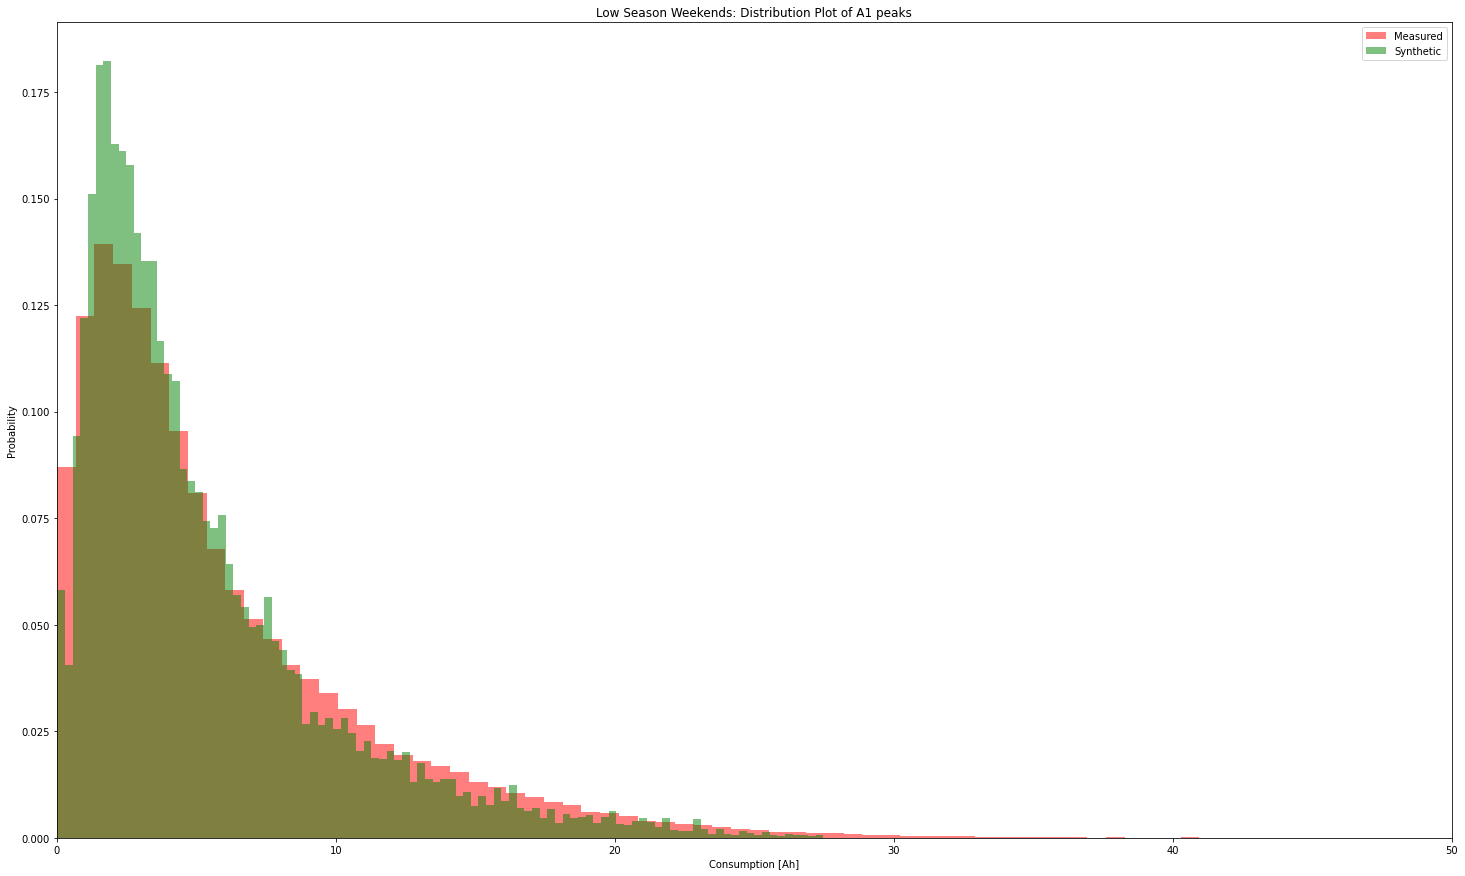

In [205]:
measured_peaks_filtered = temporary.loc[temporary.index.isin(synthetic_peaks_filtered.ProfileID.unique()),:]
# synthetic_peaks_filtered = inv_data_df.loc[inv_data_df.index.isin(profile_ids_good_fit),:]

act_A1 = measured_peaks_filtered['A1']
# act_A2 = measured_peaks_filtered['A2']
synth_A1 = synthetic_peaks_filtered['A1']
# synth_A2 = synthetic_peaks_filtered['A2']

# Normalize
kwargs = dict(alpha=0.5, bins=100, density=True, stacked=True)

# Plot
plt.hist(act_A1, **kwargs, color='r', label='Measured')
plt.hist(synth_A1, **kwargs, color='g', label='Synthetic')
# plt.hist(x3, **kwargs, color='r', label='Good')
plt.gca().set(title='Low Season Weekends: Distribution Plot of A1 peaks', ylabel='Probability')
plt.xlabel('Consumption [Ah]')
plt.xlim(0,50)
plt.legend();

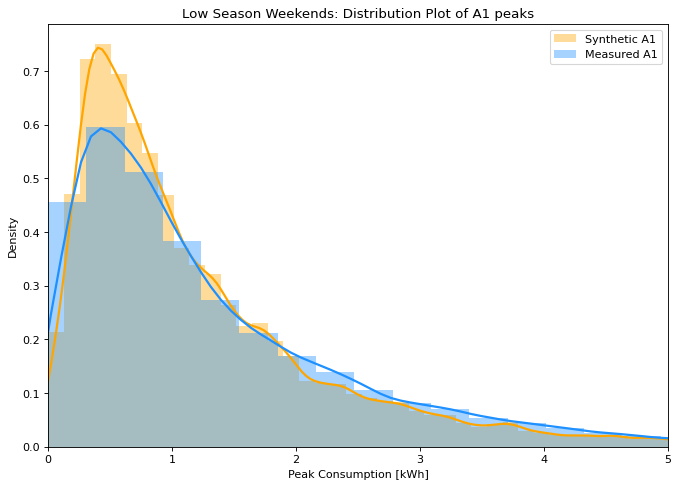

In [151]:
measured_peaks_filtered = temporary.loc[temporary.index.isin(synthetic_peaks_filtered.ProfileID.unique()),:]
# synthetic_peaks_filtered = inv_data_df.loc[inv_data_df.index.isin(profile_ids_good_fit),:]

act_A1 = measured_peaks_filtered['A1']
# act_A2 = measured_peaks_filtered['A2']
synth_A1 = synthetic_peaks_filtered['A1']
# synth_A2 = synthetic_peaks_filtered['A2']


x1 = act_A1*230/1000
x2 = synth_A1*230/1000
# x3 = act_A1
# x4 = synth_A2
# x3 = df.loc[df.cut=='Good', 'depth']

# Plot
kwargs = dict(hist_kws={'alpha':.4}, kde_kws={'linewidth':2})

plt.figure(figsize=(10,7), dpi= 80)
sns.distplot(x2.values, color="orange", label="Synthetic A1", **kwargs, kde = True)
sns.distplot(x1.values, color="dodgerblue", label="Measured A1", **kwargs,kde = True)
# sns.distplot(x4.values, color="orange", label="Synthetic A2", **kwargs)
# sns.distplot(x3.values, color="dodgerblue", label="Measured A2", **kwargs)

# sns.distplot(x3, color="deeppink", label="minivan", **kwargs)
plt.title("Low Season Weekends: Distribution Plot of A1 peaks", fontsize = 'large' )
plt.xlabel("Peak Consumption [kWh]")
plt.xlim(0,5)
plt.legend()

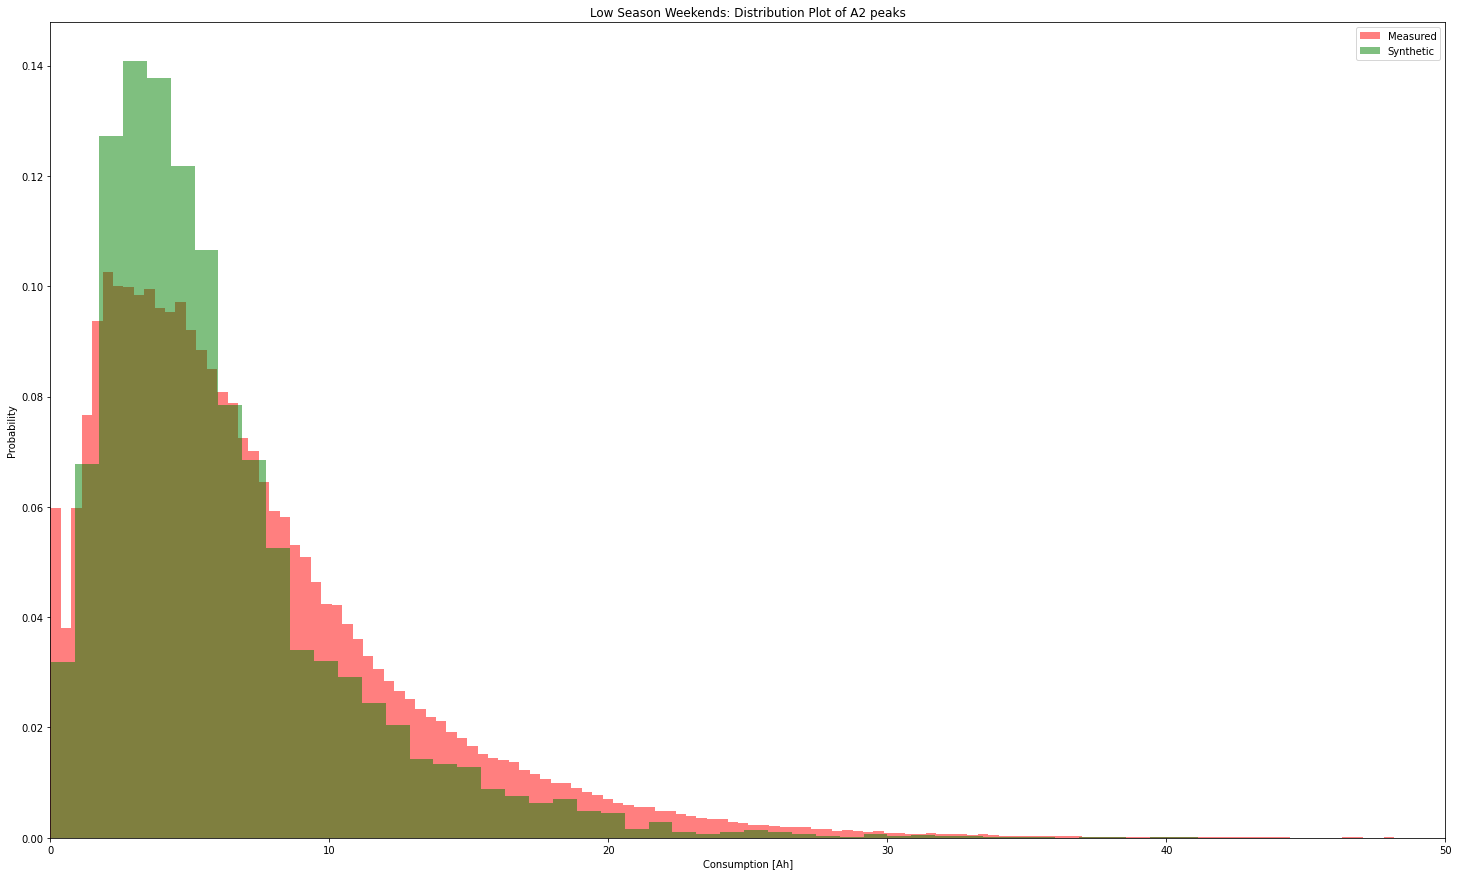

In [207]:
# act_A1 = measured_peaks_filtered['A1']
act_A2 = measured_peaks_filtered['A2']
# synth_A1 = synthetic_peaks_filtered['A1']
synth_A2 = synthetic_peaks_filtered['A2']

# Normalize
kwargs = dict(alpha=0.5, bins=200, density=True, stacked=True)

# Plot
plt.hist(act_A2, **kwargs, color='r', label='Measured')
plt.hist(synth_A2, **kwargs, color='g', label='Synthetic')
# plt.hist(x3, **kwargs, color='r', label='Good')
plt.gca().set(title='Low Season Weekends: Distribution Plot of A2 peaks', ylabel='Probability')
plt.xlabel('Consumption [Ah]')
plt.xlim(0,50)
plt.legend();

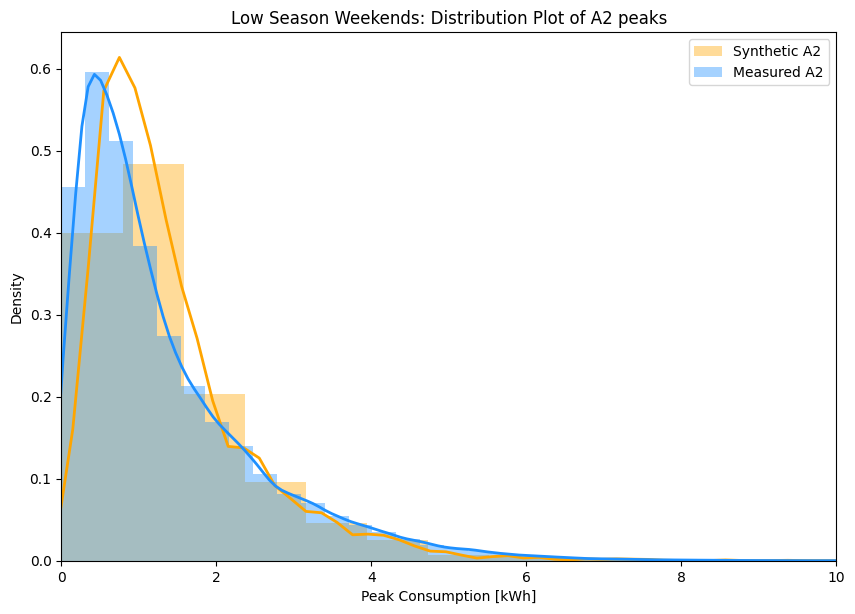

In [153]:
measured_peaks_filtered = temporary.loc[temporary.index.isin(synthetic_peaks_filtered.ProfileID.unique()),:]
# synthetic_peaks_filtered = inv_data_df.loc[inv_data_df.index.isin(profile_ids_good_fit),:]

# act_A1 = measured_peaks_filtered['A1']
act_A2 = measured_peaks_filtered['A2']
# synth_A1 = synthetic_peaks_filtered['A1']
synth_A2 = synthetic_peaks_filtered['A2']


x1 = act_A1*230/1000
x2 = synth_A1*230/1000
x3 = act_A1*230/1000
x4 = synth_A2*230/1000
# x3 = df.loc[df.cut=='Good', 'depth']

# Plot
kwargs = dict(hist_kws={'alpha':.4}, kde_kws={'linewidth':2})

plt.figure(figsize=(10,7), dpi= 100)
sns.distplot(x4.values, color="orange", label="Synthetic A2", **kwargs, kde = True)
sns.distplot(x3.values, color="dodgerblue", label="Measured A2", **kwargs, kde = True)

# sns.distplot(x3, color="deeppink", label="minivan", **kwargs)
plt.title("Low Season Weekends: Distribution Plot of A2 peaks", fontsize = 'large' )
plt.xlabel("Peak Consumption [kWh]")
plt.xlim(0,10)
plt.legend()

In [221]:
daily_energy_synth = synthetic_df.sum(axis = 1)
daily_energy_synth = pd.DataFrame(daily_energy_synth, columns = ['Daily Energy'])
daily_energy_synth.reset_index(inplace = True)

# IQR
Q1 = np.percentile(daily_energy_synth['Daily Energy'], 0,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(daily_energy_synth['Daily Energy'], 90,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", daily_energy_synth.shape)
 
# Upper bound
upper = np.where(daily_energy_synth['Daily Energy'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(daily_energy_synth['Daily Energy'] <= (Q1-1.5*IQR))
 
''' Removing the Outliers '''
daily_energy_synth.drop(upper[0], inplace = True)
daily_energy_synth.drop(lower[0], inplace = True)
 
print("New Shape: ", daily_energy_synth.shape)

Old Shape:  (505304, 2)
New Shape:  (499370, 2)


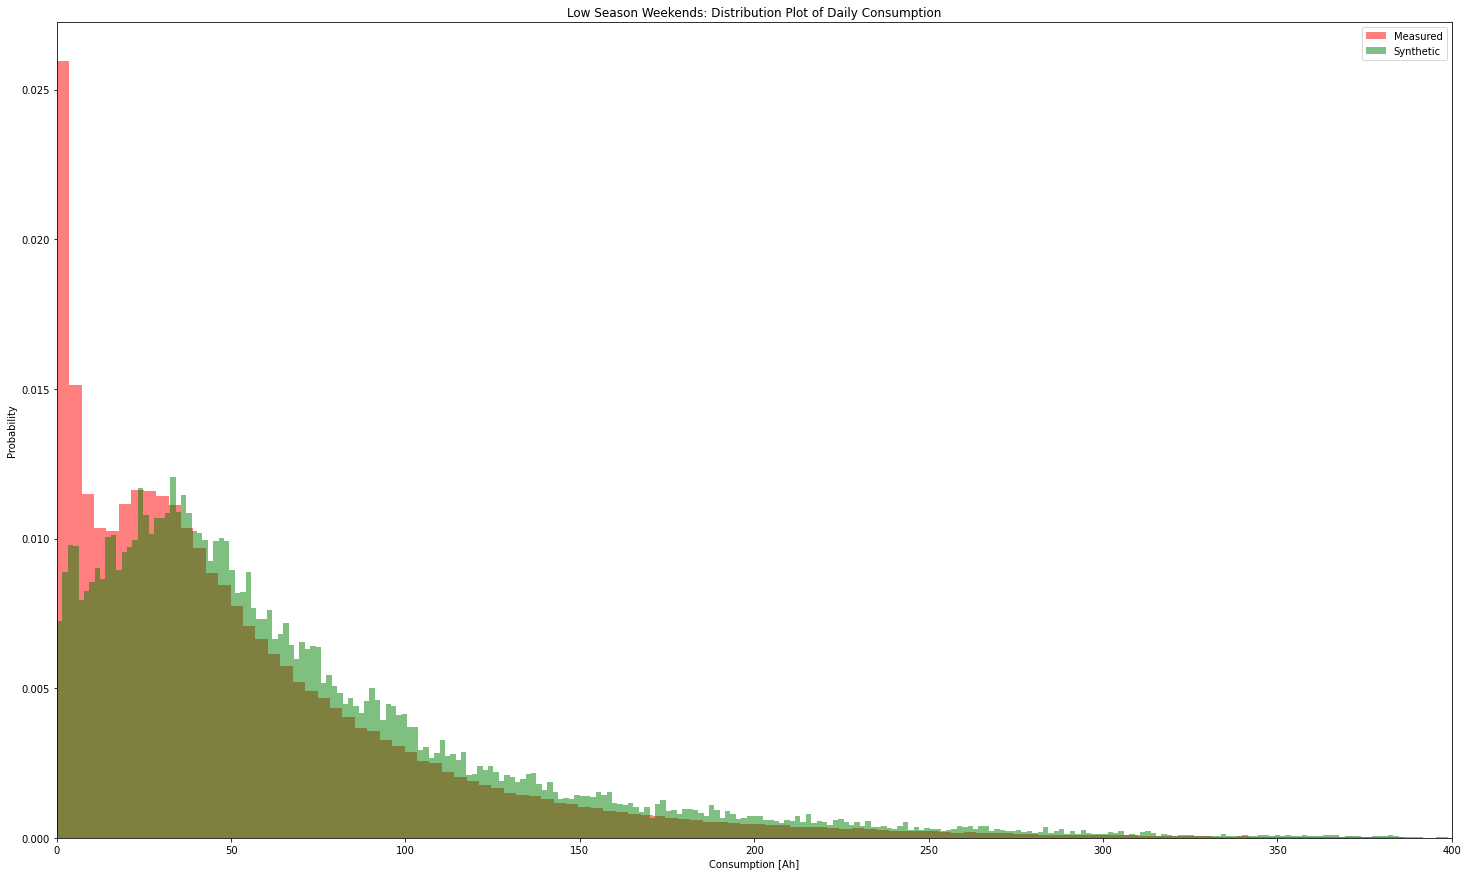

In [224]:
x1 = daily_energy_synth_filtered['Daily Energy']#*230/1000
x2 = daily_energy_actual_filtered['Daily Energy']#*230/1000

# Normalize
kwargs = dict(alpha=0.5, bins=250, density=True, stacked=True)

# Plot
plt.hist(x2, **kwargs, color='r', label='Measured')
plt.hist(x1, **kwargs, color='g', label='Synthetic')
# plt.hist(x3, **kwargs, color='r', label='Good')
plt.gca().set(title='Low Season Weekends: Distribution Plot of Daily Consumption', ylabel='Probability')
plt.xlabel('Consumption [Ah]')
plt.xlim(0,400)
plt.legend();

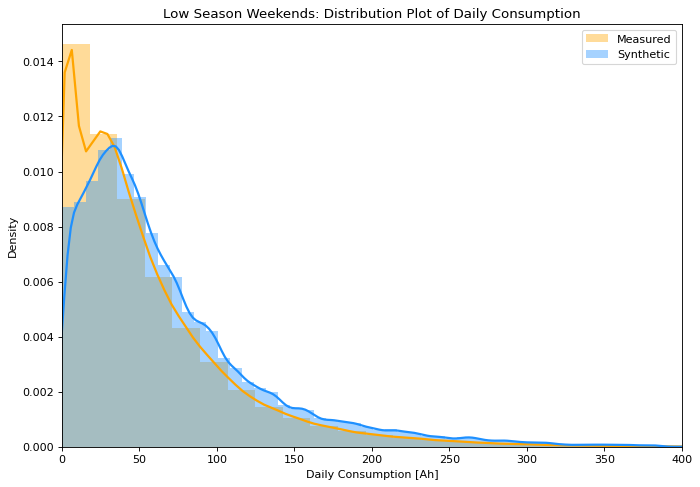

In [223]:
new_df = cleaned_df.copy()
new_df.set_index(['ProfileID','date'], inplace = True)
new_df_sum = new_df.sum(axis = 1)
daily_energy_actual = pd.DataFrame(new_df_sum, columns = ['Daily Energy'])

# daily_energy_synth = synthetic_df.sum(axis = 1)
# daily_energy_synth = pd.DataFrame(daily_energy_synth, columns = ['Daily Energy'])

daily_energy_actual.reset_index(inplace = True)
# daily_energy_synth.reset_index(inplace = True)
daily_energy_synth_filtered = daily_energy_synth#.loc[daily_energy_synth.ProfileID.isin(profile_ids_good_fit),:]
daily_energy_actual_filtered = daily_energy_actual.loc[daily_energy_actual.ProfileID.isin(daily_energy_synth.ProfileID.unique()),:]

x1 = daily_energy_synth_filtered['Daily Energy']#*230/1000
x2 = daily_energy_actual_filtered['Daily Energy']#*230/1000
# x3 = df.loc[df.cut=='Good', 'depth']

# Plot
kwargs = dict(hist_kws={'alpha':.4}, kde_kws={'linewidth':2})

plt.figure(figsize=(10,7), dpi= 80)
sns.distplot(x2.values, color="orange", label="Measured", **kwargs, kde = True)
sns.distplot(x1.values, color="dodgerblue", label="Synthetic", **kwargs, kde = True)

# sns.distplot(x3, color="deeppink", label="minivan", **kwargs)
plt.title("Low Season Weekends: Distribution Plot of Daily Consumption")
plt.xlabel("Daily Consumption [Ah]")
plt.xlim(0,400)
plt.legend()
# synth['label'] = 'synth'
# daily_energy_actual['label'] = 'observed'
# synth_obs_df = daily_energy_actual.append(daily_energy_synth, ignore_index = True)
# sampl = synth_obs_df.sample(frac = 0.25)

# sns.displot(data = sampl, x= 'Daily Energy',  stat="density", hue = 'label').set(title = 'Distribution Plot: Daily Energy')

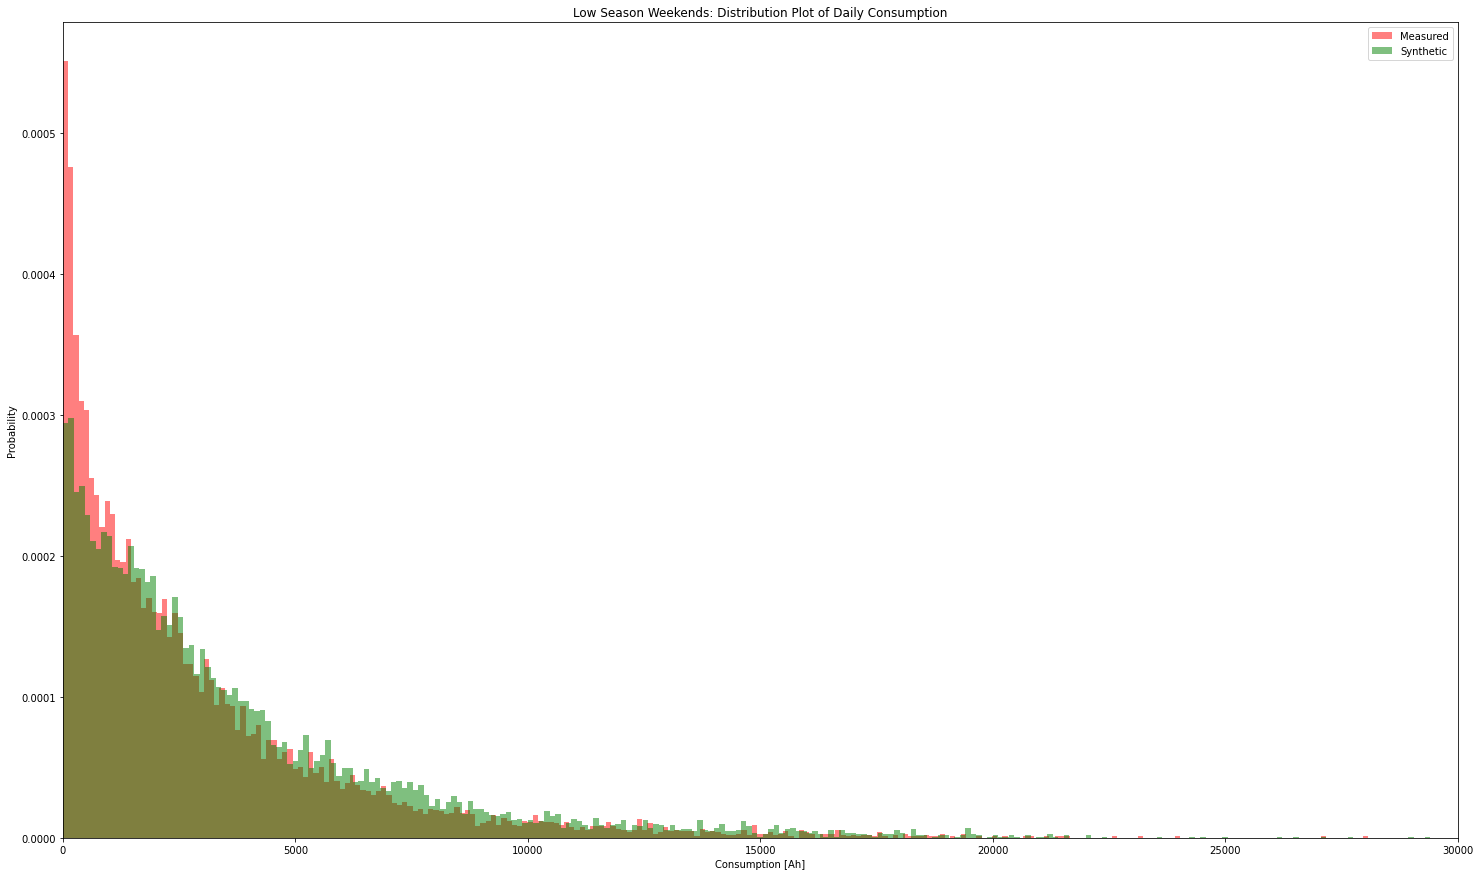

In [220]:
x1 = daily_energy_synth_filtered.groupby(['ProfileID'])['Daily Energy'].sum()#*230/1000
x2 = daily_energy_actual_filtered.groupby(['ProfileID'])['Daily Energy'].sum()#*230/1000

# Normalize
kwargs = dict(alpha=0.5, bins=250, density=True, stacked=True)

# Plot
plt.hist(x2, **kwargs, color='r', label='Measured')
plt.hist(x1, **kwargs, color='g', label='Synthetic')
# plt.hist(x3, **kwargs, color='r', label='Good')
plt.gca().set(title='Low Season Weekends: Distribution Plot of Daily Consumption', ylabel='Probability')
plt.xlabel('Consumption [Ah]')
plt.xlim(0,30000)
plt.legend();

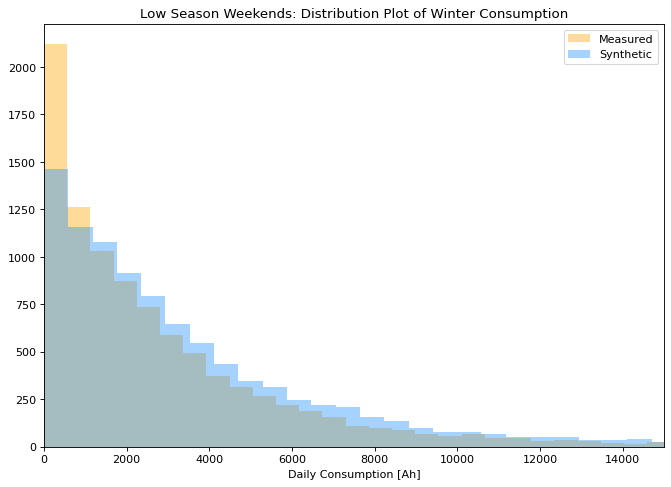

In [188]:
x1 = daily_energy_synth_filtered.groupby(['ProfileID'])['Daily Energy'].sum()#*230/1000
x2 = daily_energy_actual_filtered.groupby(['ProfileID'])['Daily Energy'].sum()#*230/1000

# Plot
kwargs = dict(hist_kws={'alpha':.4}, kde_kws={'linewidth':2})

plt.figure(figsize=(10,7), dpi= 80)
sns.distplot(x2.values, color="orange", label="Measured", **kwargs,kde = False)
sns.distplot(x1.values, color="dodgerblue", label="Synthetic", **kwargs,kde = False)

# sns.distplot(x3, color="deeppink", label="minivan", **kwargs)
plt.title("Low Season Weekends: Distribution Plot of Winter Consumption")
plt.xlabel("Daily Consumption [Ah]")
plt.xlim(0,15000)
plt.legend()

Text(0, 0.5, 'Error [kWh]')

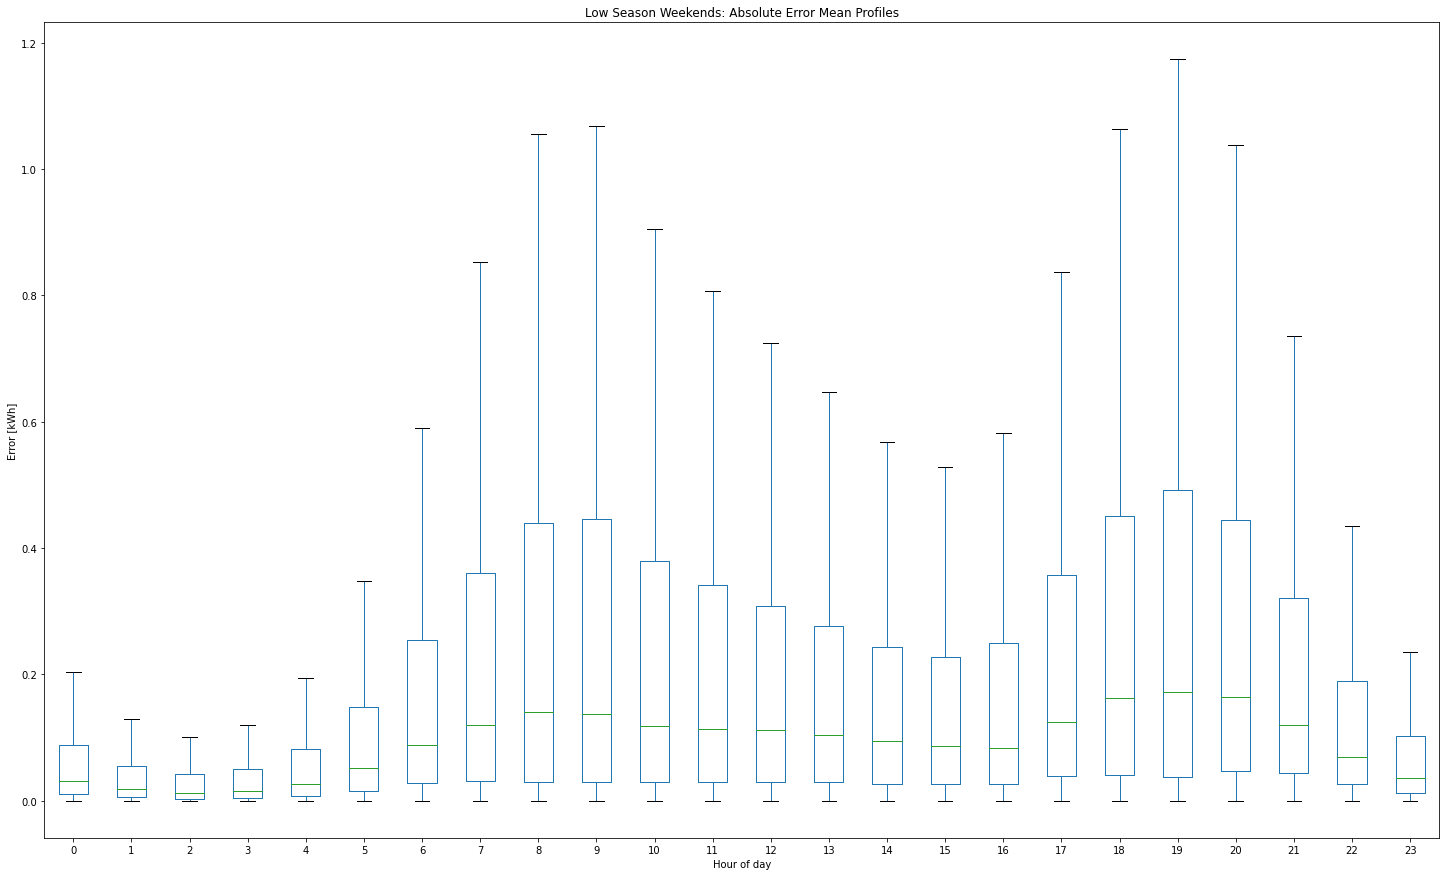

In [179]:
cleaned_df_mean = cleaned_df.groupby(['ProfileID']).mean()
cleaned_df_mean = cleaned_df_mean.sort_index()
cleaned_df_mean.head()

synthetic_df_temp = synthetic_df.reset_index()
synthetic_df_mean = synthetic_df_temp.groupby(['ProfileID']).mean()
synthetic_df_mean.drop(synthetic_df_mean.columns[[-1]], axis = 1, inplace = True)
synthetic_df_mean = synthetic_df_mean.sort_index()
synthetic_df_mean.head()

cleaned_df_mean.columns = synthetic_df_mean.columns
clean_sub_synth_mean = cleaned_df_mean.subtract(synthetic_df_mean)

abs_clean_sub_synth_mean = np.abs(clean_sub_synth_mean)
abs_clean_sub_synth_mean = abs_clean_sub_synth_mean*230/1000

abs_clean_sub_synth_mean.plot(kind = 'box', showfliers = False)
plt.rcParams['figure.figsize'] = [40,25]
plt.title("Low Season Weekends: Absolute Error Mean Profiles", fontsize = 'large')
plt.xlabel("Hour of day")
plt.ylabel("Error [kWh]")

Text(0, 0.5, 'Error [%]')

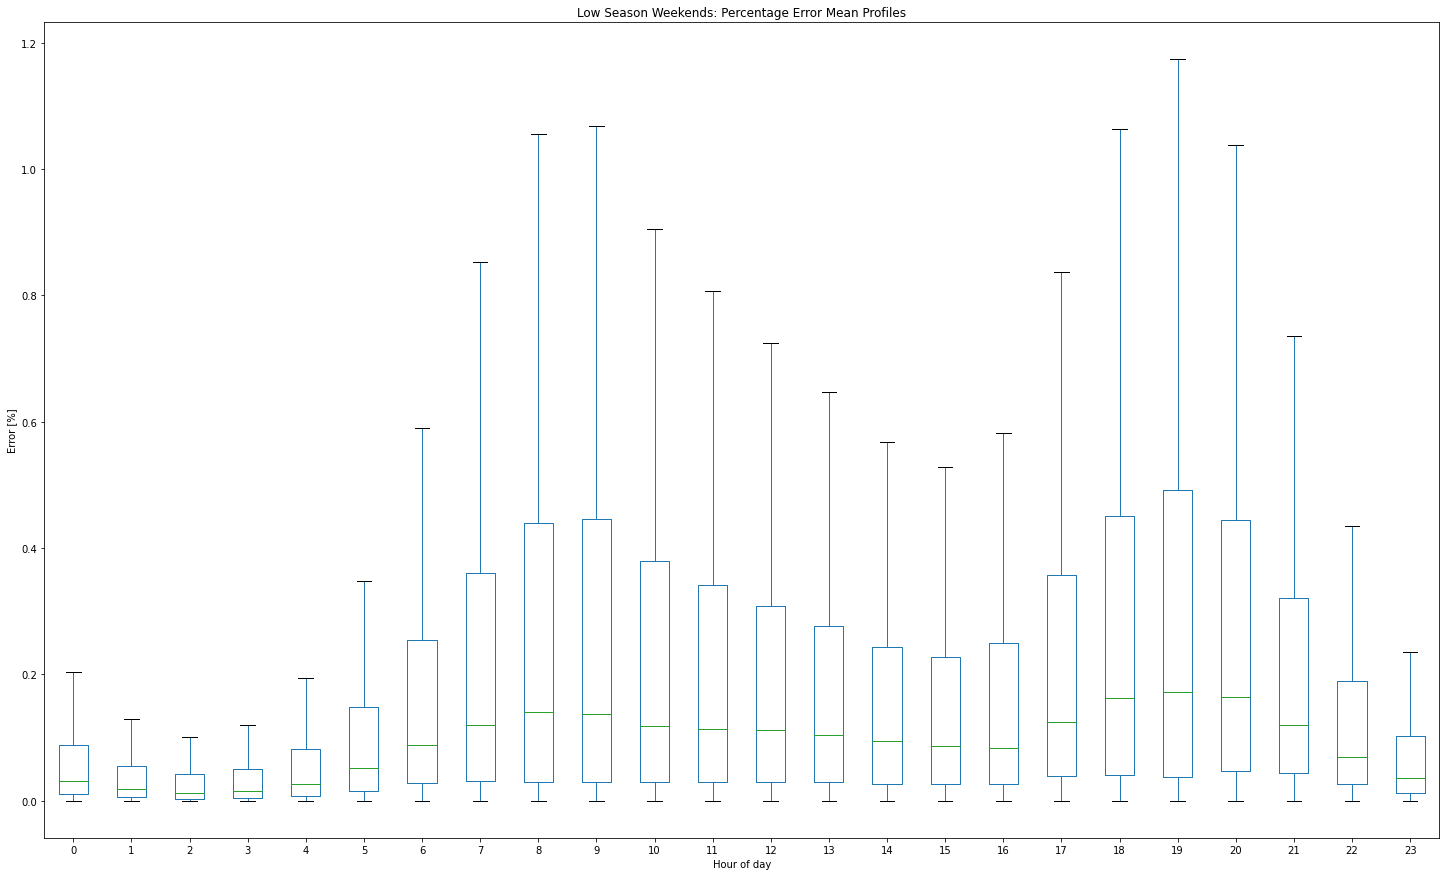

In [183]:
mean_daily_energy_sum = pd.DataFrame(cleaned_df_mean.sum(axis = 1)*230/1000)
mean_daily_energy_sum.columns

percentage_error = abs_clean_sub_synth_mean.div(mean_daily_energy_sum.values)*100

abs_clean_sub_synth_mean.plot(kind = 'box', showfliers = False)
plt.rcParams['figure.figsize'] = [25,15]
plt.title("Low Season Weekends: Percentage Error Mean Profiles", fontsize = 'large')
plt.xlabel("Hour of day")
plt.ylabel("Error [%]")

In [181]:
mean_daily_energy_sum

,0
ProfileID,
1,10.645115
3,27.654048
5,24.665823
6,17.671903
10,17.464967
...,...
12029045,64.573267
12029049,3.341900
12029058,97.135133
